# Data Imputation Scripts

## Plotter for missing data 

In [20]:
import matplotlib.pyplot as plt

title = "Imputation of Missing Values"

def plot_imputation(original_data, imputed_data, x_data, missing_indices, title=title):

    # Initial figure size configuration.
    plt.figure(figsize=(12, 6))

    # Black points for original data, red for missing data.
    plt.scatter(x_data, original_data, color='black', label='Original Data')
    plt.scatter(x_data[missing_indices], imputed_data[missing_indices], color='red', label='Imputed Data')

    
    # Connect imputed points with neighboring points and adding vertical lines.
    for idx in missing_indices:
        if idx > 0:
            plt.plot([x_data[idx - 1], x_data[idx]], [imputed_data[idx - 1], imputed_data[idx]], 'r--')
        if idx < len(x_data) - 1:
            plt.plot([x_data[idx], x_data[idx + 1]], [imputed_data[idx], imputed_data[idx + 1]], 'r--')

        plt.axvline(x=x_data[idx], color='grey', linestyle="-.", alpha=0.5)

    # Optional: Adding blue lines between datapoints.
    # plt.plot(x_data, imputed_data, 'b-', label='Data with Imputation')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.legend()
    plt.title(title)
    plt.show()

## DATASET GENERATION. CUSTOMER PURCHASE DATA

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic data
num_records = 100
customer_ids = np.random.choice(range(1, 21), num_records) 
purchase_dates = pd.date_range(start='2023-01-01', periods=num_records, freq='D')
product_categories = np.random.choice(['Electronics', 'Clothing', 'Groceries', 'Books'], num_records)
purchase_amounts = np.round(np.random.uniform(5.0, 500.0, num_records), 2)

# Create DataFrame
df = pd.DataFrame({
    'CustomerID': customer_ids,
    'PurchaseDate': purchase_dates,
    'ProductCategory': product_categories,
    'PurchaseAmount': purchase_amounts
})

# Introduce missing values
missing_indices_amount = np.random.choice(num_records, size=10, replace=False)
missing_indices_category = np.random.choice(num_records, size=10, replace=False)
df.loc[missing_indices_amount, 'PurchaseAmount'] = np.nan
df.loc[missing_indices_category, 'ProductCategory'] = np.nan

# Save the dataset to a CSV file
df.to_csv('A_customer_purchase_data.csv', index=False)


Index(['CustomerID', 'PurchaseDate', 'ProductCategory', 'PurchaseAmount'], dtype='object')


<Axes: xlabel='PurchaseDate', ylabel='PurchaseAmount'>

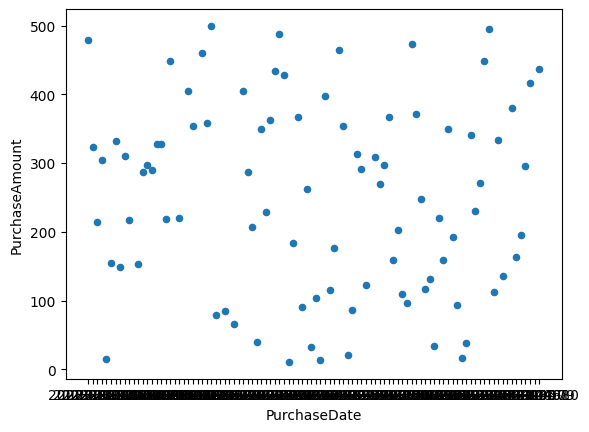

In [8]:
import pandas as pd

df = pd.read_csv("A_customer_purchase_data.csv")

print(df.columns)
df.plot.scatter(x="PurchaseDate", y="PurchaseAmount")

In [10]:
missing_indices = df[df['PurchaseAmount'].isna()].index

mean_imputed = df['PurchaseAmount'].fillna(df['PurchaseAmount'].mean())

mean_imputed

0     478.260000
1     323.780000
2     214.810000
3     305.160000
4      14.500000
         ...    
95    194.810000
96    296.220000
97    416.370000
98    250.212778
99    436.960000
Name: PurchaseAmount, Length: 100, dtype: float64

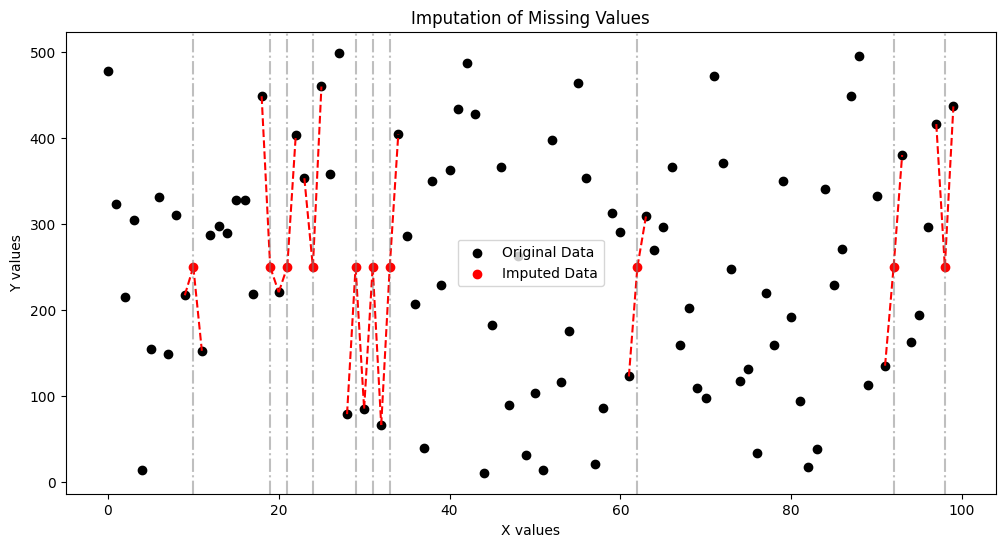

In [13]:
plot_imputation(df['PurchaseAmount'], mean_imputed, df['PurchaseDate'].index, missing_indices)

## DATASET GENERATION. ACTIVITIES BY WORKERS

In [16]:
import pandas as pd
import random
from datetime import datetime, timedelta
import numpy as np

# Definir nombres y puntuaciones ficticias
names = ["Juan", "María", "Pedro", "Ana", "Luis"]

# Elegir aleatoriamente una persona para tener errores en el tiempo de desarrollo
person_with_errors = random.choice(names)
print(person_with_errors)

# Función para generar los datos de una persona
def generar_datos_persona(person, total_registers):
    dates = [datetime(2024, 1, 1) + timedelta(days=random.randint(0, 365)) for _ in range(total_registers)]
    punctuations = [random.randint(70, 100) for _ in range(total_registers)]
    
    if person == person_with_errors:
        # Generar indices para el 20% de registros con None
        error_indexes = random.sample(range(total_registers), k=int(0.2 * total_registers))
        time_taken = [None if i in error_indexes else random.randint(1, 8) for i in range(total_registers)]
    else:
        time_taken = [random.randint(1, 8) for _ in range(total_registers)]
    
    return pd.DataFrame({
        'Date': dates,
        'Person': person,
        'Punctuation': punctuations,
        'Time_taken': time_taken
    })

# Generar datos para cada persona
dfs = []
total_registers_data = 100  # Número total de registros por persona
for name in names:
    dfs.append(generar_datos_persona(name, total_registers_data))

# Concatenar todos los DataFrames en uno solo
df = pd.concat(dfs, ignore_index=True)

# Escribir DataFrame en archivo CSV
df.to_csv('B_activities_register.csv', index=False)


Ana


In [17]:
df.notna().value_counts()

Date  Person  Punctuation  Time_taken
True  True    True         True          480
                           False          20
Name: count, dtype: int64

In [19]:
count_by_person = df.groupby('Person')['Time_taken'].apply(lambda x: x.isna().sum())
count_by_person

Person
Ana      20
Juan      0
Luis      0
María     0
Pedro     0
Name: Time_taken, dtype: int64

## SINUSOIDAL

## DATASET GENERATION. TEMPERATURE SENSOR.

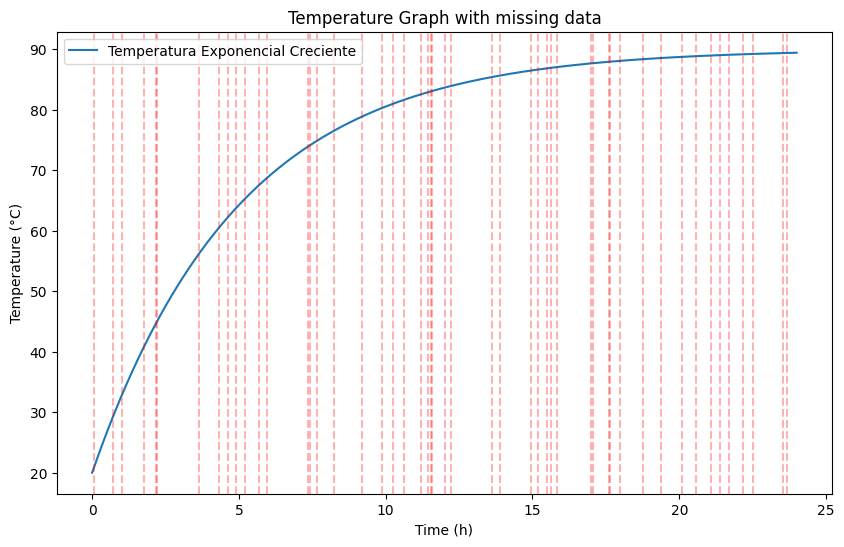

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time Generation (24hrs)
t = np.linspace(0, 24, 500)  

# Params for temperature function.
initial_T = 20  
final_T = 70  
k = 0.2  # Increase constant

# Increasing exponential behaviour.
T_exponential_increase = final_T * (1 - np.exp(-k * t)) + initial_T

# Missing data.
np.random.seed(0)
missing_size = 50
missing_indices = np.random.choice(len(T_exponential_increase), size=missing_size, replace=False)  
T_exponential_increase_with_missing = T_exponential_increase.copy()
T_exponential_increase_with_missing[missing_indices] = np.nan  

# Graph for data visualization.
plt.figure(figsize=(10, 6))
plt.plot(t, T_exponential_increase, label='Temperatura Exponencial Creciente')

# Vertical lines on missing data.
for idx in missing_indices:
    plt.axvline(x=t[idx], color='red', linestyle='--', alpha=0.3)

plt.title('Temperature Graph with missing data')
plt.xlabel('Time (h)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [3]:
import pandas as pd

# Data into dataframe.
df_temp = pd.DataFrame({
    'Tiempo': t,
    'Temperatura': T_exponential_increase_with_missing
})

# Saving CSV file.
csv_file = 'C_temperature_data.csv'

# Specify the file path and uncomment the following.
# df_temp.to_csv(csv_file, index=False)